<a href="https://colab.research.google.com/github/rroddone/TwitterAnalysis/blob/main/proyecto_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install config
#!pip install jsonpickle
!pip install emoji

     |████████████████████████████████| 133kB 4.0MB/s 


importamos las librerias que se utilizara para el proyecto

In [80]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
#import jsonpickle
import pandas as pd
import datetime
import numpy as np
import json
import seaborn as sns
import emoji
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
from google.colab import files
carga_tweets = files.upload()

Saving twitter_api_log.csv to twitter_api_log.csv


guardamos los datos con las llaves de acceso


In [6]:
log = pd.read_csv('twitter_api_log.csv', sep = ';')

creamos los credenciales

In [7]:
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

creamos las autorizaciones


In [10]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
auth.secure = True
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

vemos dentro del json de lo que esta formado un tweet


In [ ]:
print(dir(lista_tweets))

necesitaremos extraer:
- texto del tweet (.full_text)
-autor (.author.name)
-timestamp (.created_at)
-Num de favs (.favorite_count)
- num de RTs (.retweet_count)

In [12]:
num_tweets = 1000
tweets = []
autor = []
time = []
favs = []
rts = []

for i in tweepy.Cursor(api.search, q = "#miamibuildingcollapse", tweet_mode = 'extended', lang = 'es').items(num_tweets):
  tweets.append(i.full_text)
  autor.append(i.author.name)
  time.append(i.created_at)
  favs.append(i.favorite_count)
  rts.append(i.retweet_count)


convertimos los tweets extraidos en un dataframe

In [18]:
tweetlist = pd.DataFrame({'tweets':tweets,'autor':autor,'tiempo de posteo':time, 'N° de favs':favs, 'N° de RTs':rts})

convertimos los tweets crudos en csv


In [19]:
tweets_crudosCSV =[]
tweetlist.to_csv('tweets_crudos.csv')

ahora trabajaremos con el analisis de los tweets


In [54]:
def twtlimpios(texto):
    text = re.sub(r'@[A-Za-z0–9]+', '', texto) #Removing @mentions
    text = re.sub(r'#', '', texto) # Removing '#' hash tag
    text = re.sub(r'RT[\s]+', '', texto) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', texto) # Removing hyperlink
    text = re.sub(emoji.get_emoji_regexp(), "", texto) #borra los emojis
    
    return texto



In [55]:
tweetlist['tweets'] = tweetlist['tweets'].apply(twtlimpios)

In [ ]:
tweetlist

In [56]:
tweetlist.to_csv('tweetslimpios.csv')

In [43]:
"""
def limpiar_tweets(csv):
  with open(csv, 'r') as tw:
    tweets = [twtlimpios(line.strip()) for line in tw]
  tw.close()
  return tweets
  """

In [57]:
tweets = limpiar_tweets('tweetslimpios.csv')

In [82]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [ ]:
print(tweets[56])
print(TextBlob(tweets[56]).sentiment)

In [83]:
tweet_polarity = np.zeros(len(tweets))
tweet_subjectivity = np.zeros(len(tweets))

for i, twt in enumerate(tweets):
  tweet_polarity[i] = polarity(twt)
  tweet_subjectivity[i] = subjectivity(twt)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


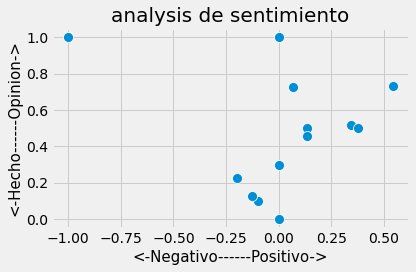

In [85]:
sns.scatterplot(tweet_polarity,    #x
                tweet_subjectivity, #y
                s = 100);


plt.title('analysis de sentimiento', fontsize = 20)
plt.xlabel('<-Negativo------Positivo->', fontsize = 15)
plt.ylabel('<-Hecho------Opinion->', fontsize = 15)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


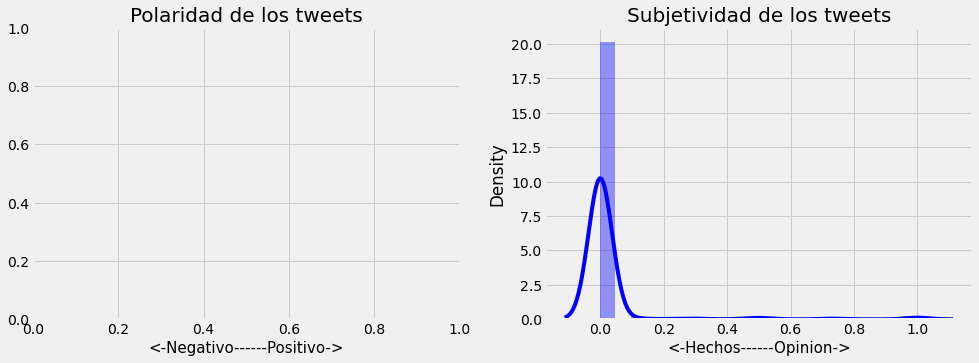

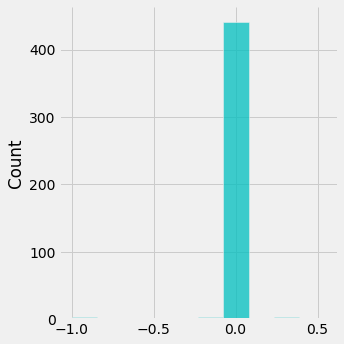

In [88]:
f, axs = plt.subplots(1, 2, figsize=(15,5))

sns.displot(tweet_polarity, color = 'c', ax = axs[0])
axs[0].set_title('Polaridad de los tweets', fontsize = 20)
axs[0].set_xlabel('<-Negativo------Positivo->', fontsize = 15)
sns.distplot(tweet_subjectivity, color = 'b', ax = axs[1])
axs[1].set_title('Subjetividad de los tweets', fontsize = 20)
axs[1].set_xlabel('<-Hechos------Opinion->', fontsize = 15)

plt.tight_layout()